# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
import matplotlib.pyplot as plt

In [2]:
# load dataset 2

In [3]:
df = pd.read_csv('2_distribution_applicant_sex_and_action_taken.csv', low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85358 entries, 0 to 85357
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   action_taken                              85358 non-null  int64  
 1   loan_type                                 85358 non-null  int64  
 2   lien_status                               85358 non-null  int64  
 3   open_end_line_of_credit                   85358 non-null  int64  
 4   loan_amount                               85358 non-null  int64  
 5   combined_loan_to_value_ratio              83673 non-null  object 
 6   interest_rate                             48750 non-null  object 
 7   total_loan_costs                          48750 non-null  object 
 8   origination_charges                       48750 non-null  object 
 9   loan_term                                 85303 non-null  object 
 10  negative_amortization             

,action_taken,loan_type,lien_status,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,...,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_sex,co_applicant_sex,applicant_age,co_applicant_age
0,3,3,1,2,205000,110.256,NaN,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,>74,65-74
1,3,2,1,2,155000,59.485,NaN,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,2,1,55-64,55-64
2,3,2,1,2,125000,61.367,NaN,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,65-74,55-64
3,3,2,1,2,55000,57.997,NaN,NaN,NaN,360,...,2.0,2.0,3.0,NaN,3.0,NaN,1,2,45-54,45-54
4,3,1,1,2,345000,78.841,NaN,NaN,NaN,180,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,45-54,45-54


# 3 applicant_ethnicity_1 and applicant_race_1 distribution

## All the applicant_race_1 and applicant_ethnicity_1 columns we want

applicant_ethnicity_1                     
                 
co_applicant_ethnicity_1 

applicant_race_1                          
applicant_race_2                         

co_applicant_race_1                      
co_applicant_race_2                      

## Columns we use for the model

In [4]:
columns_of_interest = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

In [5]:
info_df = df[columns_of_interest]
print(info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85358 entries, 0 to 85357
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_ethnicity_1     85037 non-null  float64
 1   co_applicant_ethnicity_1  85047 non-null  float64
 2   applicant_race_1          85266 non-null  float64
 3   applicant_race_2          4568 non-null   float64
 4   co_applicant_race_1       85256 non-null  float64
 5   co_applicant_race_2       4647 non-null   float64
dtypes: float64(6)
memory usage: 3.9 MB
None


# Race

Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

### We only want 5 - White and 3 - Black or African American

In [6]:
# Columns of interest
columns_of_race = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

# Ethnicity

Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

### We only want 2 - Not Hispanic or Latino & 1 - Hispanic or Latino 

In [7]:
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Remove applicant_race_1 and applicant_ethnicity_1

In [8]:
df['applicant_race_2'].value_counts()

applicant_race_2
21.0    1106
22.0    1029
5.0      570
23.0     556
26.0     442
25.0     315
27.0     278
24.0     102
44.0      50
3.0       46
4.0       25
41.0      23
42.0      11
43.0       9
2.0        6
Name: count, dtype: int64

In [9]:
# Define the criteria for applicant_race_1 and applicant_ethnicity_1
race_criteria1 = (df['applicant_race_1'].isin([3, 5]))
race_criteria2 = (df['co_applicant_race_1'].isin([3, 5]))
ethnicity_criteria1 = (df['applicant_ethnicity_1'].isin([1, 2]))
ethnicity_criteria2 = (df['co_applicant_ethnicity_1'].isin([1, 2]))

# Combine the criteria using logical AND for applicant_ethnicity_1
combined_criteria = race_criteria1 & ethnicity_criteria1 & race_criteria2 & ethnicity_criteria2 

# Apply the combined criteria to filter the DataFrame
filtered_df = df[combined_criteria]

# Print the value counts for the filtered DataFrame
print("Value counts for applicant_race_1 after filtering:")
print(filtered_df['applicant_race_1'].value_counts())
print(filtered_df['co_applicant_race_1'].value_counts())
print(filtered_df['applicant_race_2'].value_counts())
print(filtered_df['co_applicant_race_2'].value_counts())

print("Value counts for applicant_ethnicity_1 after filtering:")
print(filtered_df['applicant_ethnicity_1'].value_counts())
print(filtered_df['co_applicant_ethnicity_1'].value_counts())

Value counts for applicant_race_1 after filtering:
applicant_race_1
5.0    59524
3.0     3410
Name: count, dtype: int64
co_applicant_race_1
5.0    59505
3.0     3429
Name: count, dtype: int64
applicant_race_2
5.0     85
27.0    32
23.0    26
21.0    17
24.0    14
25.0    14
22.0    14
44.0    11
26.0     9
41.0     4
43.0     2
Name: count, dtype: int64
co_applicant_race_2
5.0     85
23.0    26
27.0    24
24.0    24
21.0    20
25.0    13
22.0    10
1.0      8
26.0     8
44.0     8
41.0     4
2.0      4
3.0      1
4.0      1
Name: count, dtype: int64
Value counts for applicant_ethnicity_1 after filtering:
applicant_ethnicity_1
2.0    56532
1.0     6402
Name: count, dtype: int64
co_applicant_ethnicity_1
2.0    56346
1.0     6588
Name: count, dtype: int64


In [10]:
# Calculate the number of rows in the original DataFrame
original_row_count = len(df)

# Calculate the number of rows in the filtered DataFrame
filtered_row_count = len(filtered_df)

# Calculate the number of rows removed
rows_removed = original_row_count - filtered_row_count

# Print the results
print(f"Number of rows in the original DataFrame: {original_row_count}")
print(f"Number of rows in the filtered DataFrame: {filtered_row_count}")
print(f"Number of rows removed: {rows_removed}")


Number of rows in the original DataFrame: 85358
Number of rows in the filtered DataFrame: 62934
Number of rows removed: 22424


In [11]:
filtered_df.to_csv('3_distribution_race_ethnicity.csv', index=False)

# Visualisations

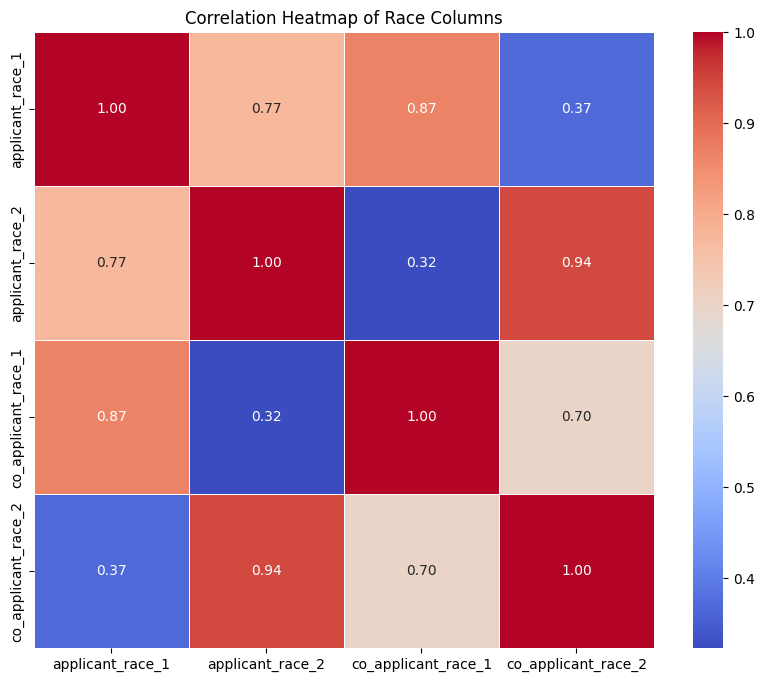

In [12]:
# Select the specified applicant_race_1 columns
selected_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
selected_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Race Columns')
plt.show()

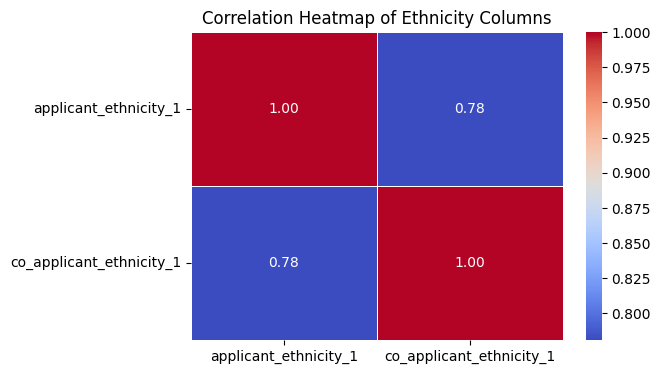

In [13]:
# Select the specified applicant_ethnicity_1 columns
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_df =  filtered_df[columns_of_ethnicity]

# Calculate the correlation matrix
correlation_matrix_ethnicity = ethnicity_df.corr()

# Plot the heatmap for applicant_ethnicity_1 columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Ethnicity Columns')
plt.show()

In [14]:
# Define the applicant_race_1 and applicant_ethnicity_1 categories
race_categories = ['5.0', '3.0']
ethnicity_categories = ['2.0', '1.0']

# Define the columns for applicant_race_1 and applicant_ethnicity_1
race_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Initialize counts for each combination
race_counts = [[0] * len(race_categories) for _ in range(len(race_columns))]
ethnicity_counts = [[0] * len(ethnicity_categories) for _ in range(len(ethnicity_columns))]

# Iterate through the DataFrame and count combinations
for idx, row in filtered_df.iterrows():
    for i, col in enumerate(race_columns):
        race_val = str(row[col])
        if race_val in race_categories:
            race_counts[i][race_categories.index(race_val)] += 1

    for i, col in enumerate(ethnicity_columns):
        ethnicity_val = str(row[col])
        if ethnicity_val in ethnicity_categories:
            ethnicity_counts[i][ethnicity_categories.index(ethnicity_val)] += 1

# Now, race_counts and ethnicity_counts have the counts for each combination
print('Race Counts:', race_counts)
print('Ethnicity Counts:', ethnicity_counts)


Race Counts: [[59524, 3410], [85, 0], [59505, 3429], [85, 1]]
Ethnicity Counts: [[56532, 6402], [56346, 6588]]


In [15]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['1.0', '2.0'], index=categories)
    df.index.name = 'ethnicity_categories'
    return df

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Generate and display the Ethnicity Counts table
print('Ethnicity Counts:')
ethnicity_table = generate_counts_table(ethnicity_counts, ethnicity_categories)
print(ethnicity_table)

Ethnicity Counts:
                            1.0   2.0
ethnicity_categories                 
applicant_ethnicity_1     56532  6402
co_applicant_ethnicity_1  56346  6588


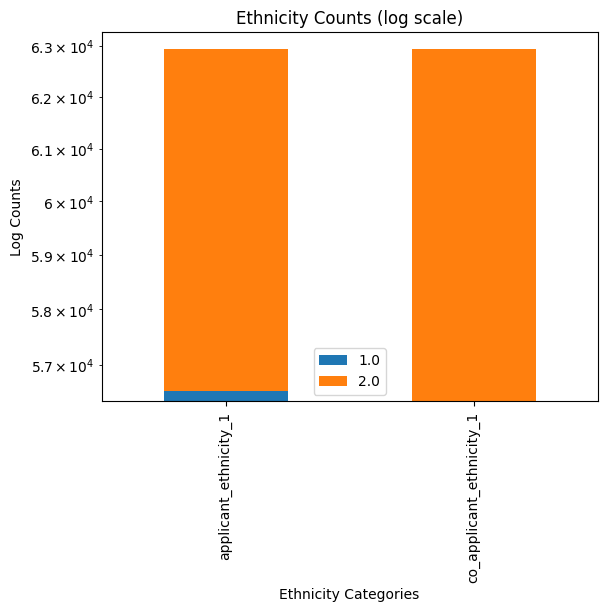

In [16]:
# Plot the Ethnicity Counts on a logarithmic scale
ethnicity_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Ethnicity Categories')
plt.ylabel('Log Counts')
plt.title('Ethnicity Counts (log scale)')
plt.show()

In [17]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['5.0', '3.0'], index=categories)
    df.index.name = 'race_categories'
    return df

race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

# Generate and display the Race Counts table
print('Race Counts:')
race_table = generate_counts_table(race_counts, race_categories)
print(race_table)

Race Counts:
                       5.0   3.0
race_categories                 
applicant_race_1     59524  3410
applicant_race_2        85     0
co_applicant_race_1  59505  3429
co_applicant_race_2     85     1


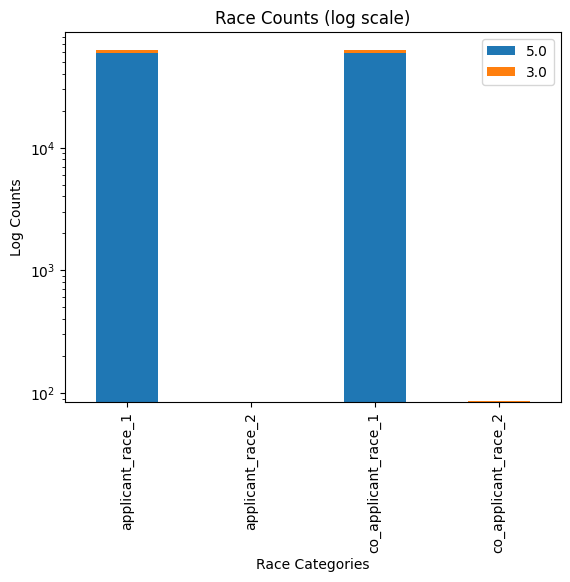

In [18]:
# Plot the Race Counts on a logarithmic scale
race_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Race Categories')
plt.ylabel('Log Counts')
plt.title('Race Counts (log scale)')
plt.show()

## See all the WHITE applicants.

In [19]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_5 = filtered_df[(filtered_df['applicant_race_1'] == 5.0)]

race_columns1 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns1 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns = race_columns1 + ethnicity_columns1
filtered_df_selected_columns = filtered_df_applicant_race_1_5[selected_columns]

In [20]:
filtered_df_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59524 entries, 0 to 85357
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_race_2          135 non-null    float64
 1   co_applicant_race_1       59524 non-null  float64
 2   co_applicant_race_2       192 non-null    float64
 3   applicant_ethnicity_1     59524 non-null  float64
 4   co_applicant_ethnicity_1  59524 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [21]:
# Sort with NaN values at the bottom
df_sorted = pd.concat([filtered_df_selected_columns.dropna(), 
                       filtered_df_selected_columns[filtered_df_selected_columns.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics = df_sorted.describe()

In [22]:
print(statistics)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count        135.000000         59524.000000           192.000000   
mean          25.866667             4.985250            18.776042   
std            5.711732             0.171125            10.680356   
min           21.000000             3.000000             1.000000   
25%           23.000000             5.000000             5.000000   
50%           24.000000             5.000000            23.000000   
75%           27.000000             5.000000            25.000000   
max           44.000000             5.000000            44.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count           59524.000000              59524.000000  
mean                1.893908                  1.891405  
std                 0.307957                  0.311133  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- White applicants generally have only one applicant_race_1.
- Most co applicants for white people are black.
- Some co applicants have a 2nd applicant_race_1.

- White applicants do NOT have Hispanic or Latino applicant_ethnicity_1
- Same for the co applicant.

## See all the BLACK applicants.

In [23]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_3 = filtered_df[(filtered_df['applicant_race_1'] == 3.0)]

race_columns2 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns2 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns2 = race_columns2 + ethnicity_columns2
filtered_df_selected_columns2 = filtered_df_applicant_race_1_3[selected_columns2]

In [24]:
filtered_df_selected_columns2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3410 entries, 3 to 85310
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_race_2          93 non-null     float64
 1   co_applicant_race_1       3410 non-null   float64
 2   co_applicant_race_2       44 non-null     float64
 3   applicant_ethnicity_1     3410 non-null   float64
 4   co_applicant_ethnicity_1  3410 non-null   float64
dtypes: float64(5)
memory usage: 159.8 KB


In [25]:
# Sort with NaN values at the bottom
df_sorted2 = pd.concat([filtered_df_selected_columns2.dropna(), 
                       filtered_df_selected_columns2[filtered_df_selected_columns2.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics2 = df_sorted2.describe()

In [26]:
print(statistics2)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count         93.000000          3410.000000            44.000000   
mean           7.677419             3.246334             8.045455   
std            9.276151             0.657354            10.034718   
min            5.000000             3.000000             5.000000   
25%            5.000000             3.000000             5.000000   
50%            5.000000             3.000000             5.000000   
75%            5.000000             3.000000             5.000000   
max           44.000000             5.000000            44.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count            3410.000000               3410.000000  
mean                1.974487                  1.963636  
std                 0.157701                  0.187221  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- Black applicants mostly are one applicant_race_1, but some are mixed.
- co applicants for black people are fairly evenly spread black and white.
- Some co applicants have a 2nd applicant_race_1.

- Black applicants do NOT have Hispanic or Latino applicant_ethnicity_1
- Same for the co applicant.